In [1]:
from __future__ import division
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.datasets.samples_generator import make_regression

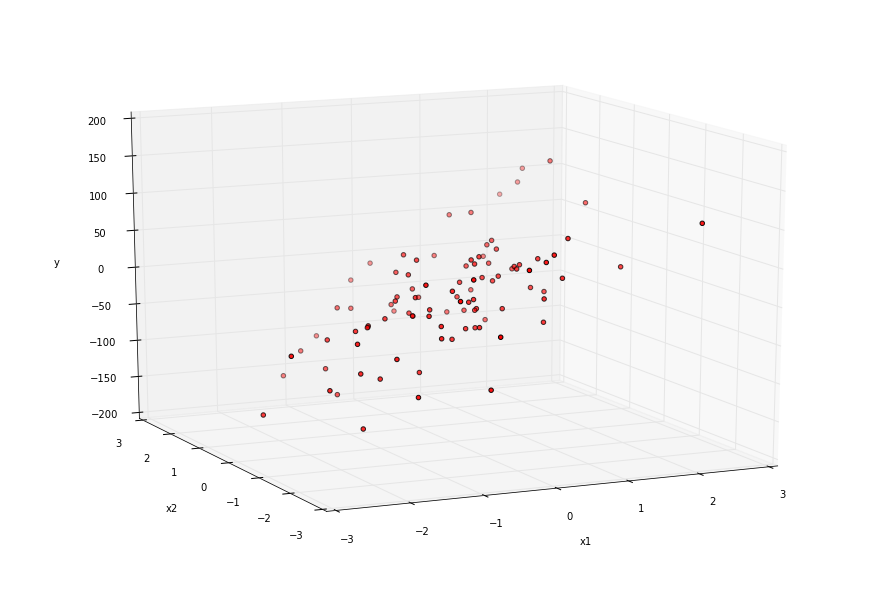

In [3]:
# randomly generate a regression sample dataset
x, y = make_regression(n_samples=100, n_features=5, n_informative=1, random_state=0, noise=35) 

# Create the 3d plot -- skip reading this
xx1, xx2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 100), 
                       np.linspace(x[:, 1].min(), x[:, 1].max(), 100))

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(x[:,0], x[:, 1], y, c='r', marker='o')

# set axis labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [12]:
def gradient_descent(x, y, alpha=0.01, regu=0.1, iterations=1000, stop=0.0001):
    m = len(x)
    
    gradient = []
    
    a = np.ones(shape=(len(x), 1))  
    x_ = np.hstack((a, x))
    theta = np.random.rand(x_.shape[1])
    initial_loss = np.sum((np.sum(theta * x_, axis=1) - y) ** 2)
    
    for n in xrange(iterations):    
        g = (1/m) * ((np.sum(theta * x_, axis=1) - y) * x_.T).sum(axis=1)
        theta = theta*(1 - alpha * (regu / m)) - alpha * g
        loss = np.sum((np.sum(theta * x_, axis=1) - y) ** 2)
        
        if np.abs(initial_loss - loss) <= stop:
            print 'converged with {} iterations'.format(n)
            return theta, gradient
        
        initial_loss = loss
        gradient.append([n, initial_loss])
        
    print 'max iterations reached'
    return theta, gradient

In [13]:
theta, gradient = gradient_descent(x, y, iterations=2000, alpha=0.5)

converged with 27 iterations


In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)

print '{} {}'.format(theta[0], theta[1:])
print '{} {}'.format(regr.intercept_, regr.coef_)

-7.25397702895 [  4.61468258e+01  -2.54560159e-02  -8.33664764e+00   2.06028798e+00
  -2.40248463e+00]
-7.25844788765 [  4.61922854e+01  -2.95938536e-02  -8.34444230e+00   2.06984007e+00
  -2.40198344e+00]


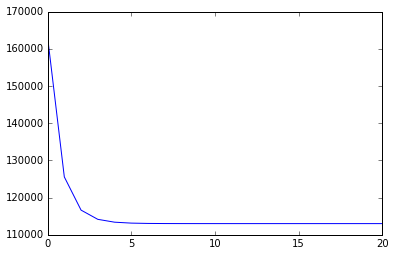

In [10]:
x_axes, y_axes = zip(*gradient)
plt.plot(x_axes, [ax for ax in y_axes])
plt.show()

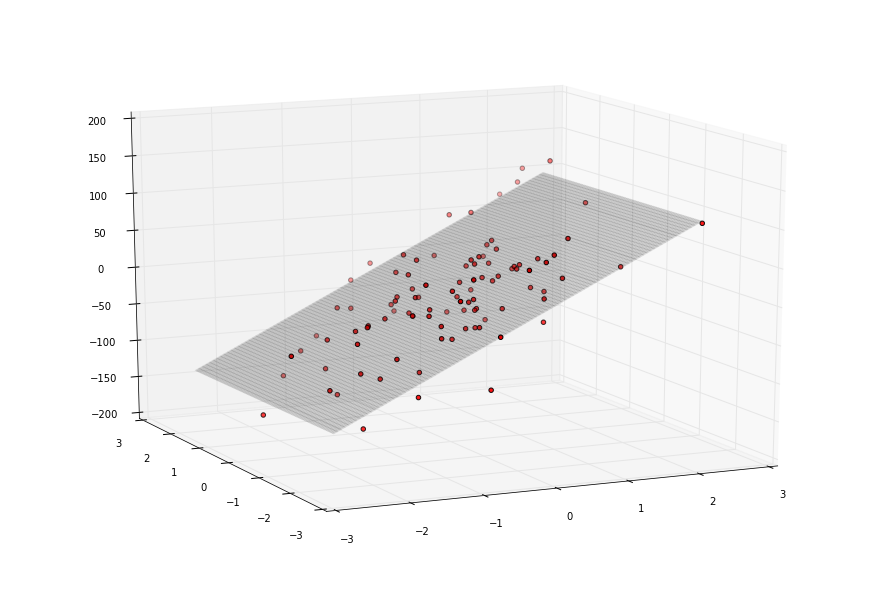

In [11]:
# Create the 3d plot -- skip reading this
xx1, xx2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 100), np.linspace(x[:, 1].min(), x[:, 1].max(), 100))

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(x[:,0], x[:, 1], y, c='r', marker='o')

Z = theta[0] + theta[1] * xx1 + theta[2] * xx2

ax.plot_surface(xx1, xx2, Z,
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.08)